<a href="https://colab.research.google.com/github/AmoNops/my-apps/blob/main/AI_Job_Market_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The AI jobmarket is undergoing rapid transformation, which is driven by the surge in AI adoption and the increasing integration of automation across industries. As companies across sectors like Technology, Healthcare and Finance embrace AI, the demand for specialised skills, competitive salaries and future-proof job roles has skyrocketed. This shift has also brought the looming risk of automation, challeging professionals to adapt and stay relevant in a changing landscape.

This project explores and analyses critical trends in the AI job market, focusing on AI adoption, industry growth, salary dynamics and automation risk, using a dataset of 500 unique job listings across various industries. The data was cleaned, transformed, and enriched through feature engineering. Key insights include salary distributions, the impact of remote work, in-demand skills, and the relationship between AI adoption and job growth. The project applies data preparation, analytics, and visualization techniques to provide a clear view of current trends in the AI job market, supporting informed decision-making in hiring and career development.

## The Data Source

The dataset used in this project is a synthetic but realistic representation of the modern job market, designed to assist researchers, data scientists, and policymakers in exploring the impact of AI on employment and job market trends.
The name of the dataset is called data AI-Powered Job Market Insights on [kaggle](https://www.kaggle.com) and the [dataset and description can be found here](https://www.kaggle.com/datasets/uom190346a/ai-powered-job-market-insights).

## Import Statements






In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Data Preparation

Before analsing a dataset, it is essential to perform data preparation. Data preparation includes loading the dataset, check for missing values, handling missing values, ensuring data types are appropriate which may include converting data types and finaly encoding categorial variables.

In [2]:
df = pd.read_csv('ai_job_market_insights.csv')

In [3]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [4]:
df.tail()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable
499,HR Manager,Entertainment,Medium,Berlin,Medium,High,Project Management,68764.378921,Yes,Decline


In [5]:
missing_values = df.isnull().sum()

In [6]:
print("Missing values per column:\n", missing_values)

Missing values per column:
 Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64


In [8]:
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 Job_Title                 object
Industry                  object
Company_Size              object
Location                  object
AI_Adoption_Level         object
Automation_Risk           object
Required_Skills           object
Salary_USD               float64
Remote_Friendly           object
Job_Growth_Projection     object
dtype: object


In [9]:
# Convert categorical columns to category data type
categorical_columns = ['Job_Title', 'Industry', 'Company_Size', 'Location',
                       'AI_Adoption_Level', 'Automation_Risk',
                       'Required_Skills', 'Remote_Friendly', 'Job_Growth_Projection']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Verify data types
data_types = df.dtypes

In [12]:
print("Data Types:\n", data_types)

Data Types:
 Job_Title                category
Industry                 category
Company_Size             category
Location                 category
AI_Adoption_Level        category
Automation_Risk          category
Required_Skills          category
Salary_USD                float64
Remote_Friendly          category
Job_Growth_Projection    category
dtype: object


## Data Analytics


What is the average salary for each Industry and how does it compare across different companies?

In [13]:
avg_salary_by_industry = df.groupby('Industry')['Salary_USD'].mean().sort_values(ascending=False)
print(avg_salary_by_industry)

Industry
Finance               94355.465599
Entertainment         94291.233910
Education             93798.521907
Energy                92763.939416
Healthcare            91688.504404
Retail                91232.897408
Technology            91204.011373
Telecommunications    90418.304458
Manufacturing         86590.003715
Transportation        85058.296977
Name: Salary_USD, dtype: float64


<ipython-input-13-e1841ff50b8e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_industry = df.groupby('Industry')['Salary_USD'].mean().sort_values(ascending=False)


The informaton above shows the average salary across different industries. From this information we can see that the top three are Finance, Entertainment and Education and the others follow as shown.

In [15]:
salary_by_industry_company = df.groupby(['Industry', 'Company_Size'])['Salary_USD'].mean().reset_index()

<ipython-input-15-0d469eb23f81>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_by_industry_company = df.groupby(['Industry', 'Company_Size'])['Salary_USD'].mean().reset_index()


In [18]:
average_salary_sorted = salary_by_industry_company.sort_values(by=['Industry', 'Company_Size'])
print(average_salary_sorted)

              Industry Company_Size     Salary_USD
0            Education        Large   93715.887142
1            Education       Medium   92139.923472
2            Education        Small   95788.591475
3               Energy        Large   88531.452753
4               Energy       Medium   91781.059833
5               Energy        Small   97345.216101
6        Entertainment        Large   85319.027913
7        Entertainment       Medium   93392.522794
8        Entertainment        Small  101155.940335
9              Finance        Large   96922.207028
10             Finance       Medium   91958.266395
11             Finance        Small   95464.429616
12          Healthcare        Large   91239.494193
13          Healthcare       Medium   95201.180976
14          Healthcare        Small   89509.624279
15       Manufacturing        Large   88609.293913
16       Manufacturing       Medium   85131.755450
17       Manufacturing        Small   85847.356884
18              Retail        L

The above informatio shows the average salary for each industry based on aross company sizes.

## Data Visualisation


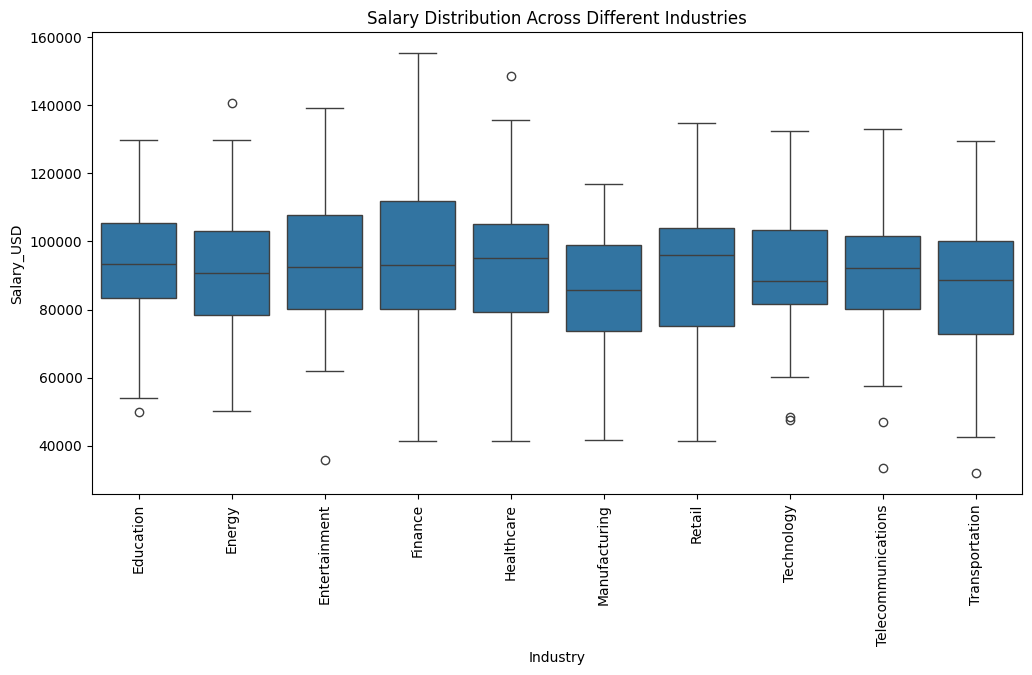

In [20]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for salary distribution by industry
sns.boxplot(x='Industry', y='Salary_USD', data=df)
plt.title('Salary Distribution Across Different Industries')
plt.xticks(rotation=90)
plt.show()

The boxplot above shows the spread of salaries across various industries and helps identify any outliers which are displayed as circles. We see the only industries to not have outliers are Finance, Manufacturing and Retail which means the salaries across these industries are relatively consistent.

## Data Analysis

In [29]:
# Filter the dataset for jobs with high automation risk
high_risk_jobs = df[df['Automation_Risk'] == 'High']

# Count the occurrences of each skill
top_skills = high_risk_jobs['Required_Skills'].value_counts().head(5)

# Print the top 5 skills
print("Top 5 Skills in High Automation Risk Jobs:\n", top_skills)


Top 5 Skills in High Automation Risk Jobs:
 Required_Skills
Sales                 24
Project Management    23
Machine Learning      19
Cybersecurity         18
Data Analysis         18
Name: count, dtype: int64


Shown above are the top 5 skills required in jobs the with high risk of automation which means that the jobs solely or mostly using these skills are at the highest risk of automation.

### Advanced Data Analysis

In [31]:
# Split the 'Required_Skills' column by commas and flatten the list
all_skills = df['Required_Skills'].str.split(',').explode()

# Count the frequency of each skill
skill_counts = all_skills.value_counts().head(5)

# Display the top 5 skills
print("Top 5 Skills for AI Jobs:\n", skill_counts)


Top 5 Skills for AI Jobs:
 Required_Skills
Project Management    60
Python                60
Cybersecurity         58
Machine Learning      52
UX/UI Design          49
Name: count, dtype: int64


Shown above are 5 required skills for AI Jobs.

### Data Visualisation

Required_Skills
Marketing             10
Sales                  9
UX/UI Design           8
Python                 6
Data Analysis          5
JavaScript             5
Machine Learning       4
Project Management     4
Cybersecurity          4
Communication          1
Name: count, dtype: int64


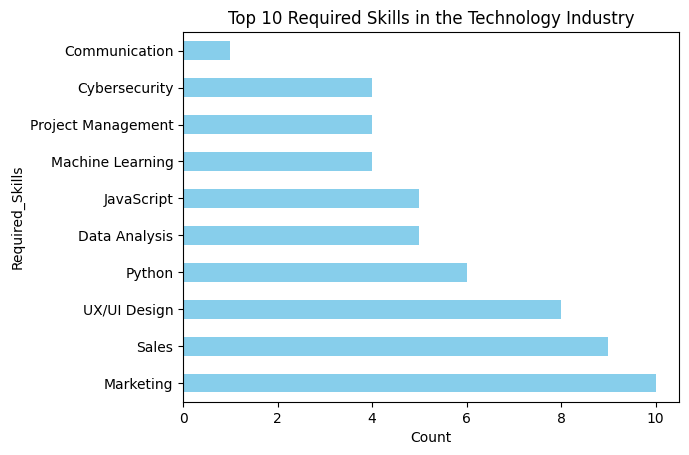

In [55]:
# Filter the dataframe for a specific industry (e.g., 'Healthcare')
industry_jobs = df[df['Industry'] == 'Technology']

# Extract and count the required skills for the industry
industry_skills = industry_jobs['Required_Skills'].str.split(',').explode().value_counts().head(10)

# Display the top 10 skills
print(industry_skills)

# Plotting the result
industry_skills.plot(kind='barh', color='skyblue', title='Top 10 Required Skills in the Technology Industry')
plt.xlabel('Count')
plt.show()


This bar chart shows the most common skills required for AI jobs in a specific industry (e.g., Technology), providing insights into in-demand skills.
The most in demand skill in Technology according to the bar chart is Marketing.

## Data Visualisation

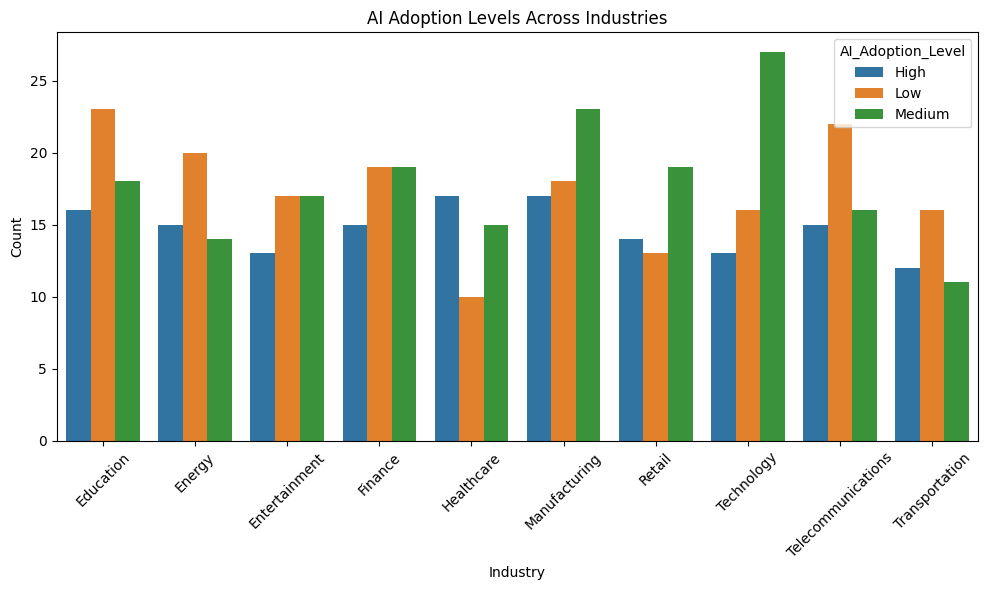

In [34]:
# Create a countplot for AI adoption level by industry
plt.figure(figsize=(10,6))
sns.countplot(x='Industry', hue='AI_Adoption_Level', data=df)

# Add labels and title
plt.title('AI Adoption Levels Across Industries')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar plot above shows the distribution of AI adoption levels across industries and shows that the Healthcare ad Manufacturing industries have the most high AI adoption level count, Technology has the most medium AI adoption level count and Education has the most low AI adoption level count.
This tells us the Education Sector/Industry is the least at risk for Automation.

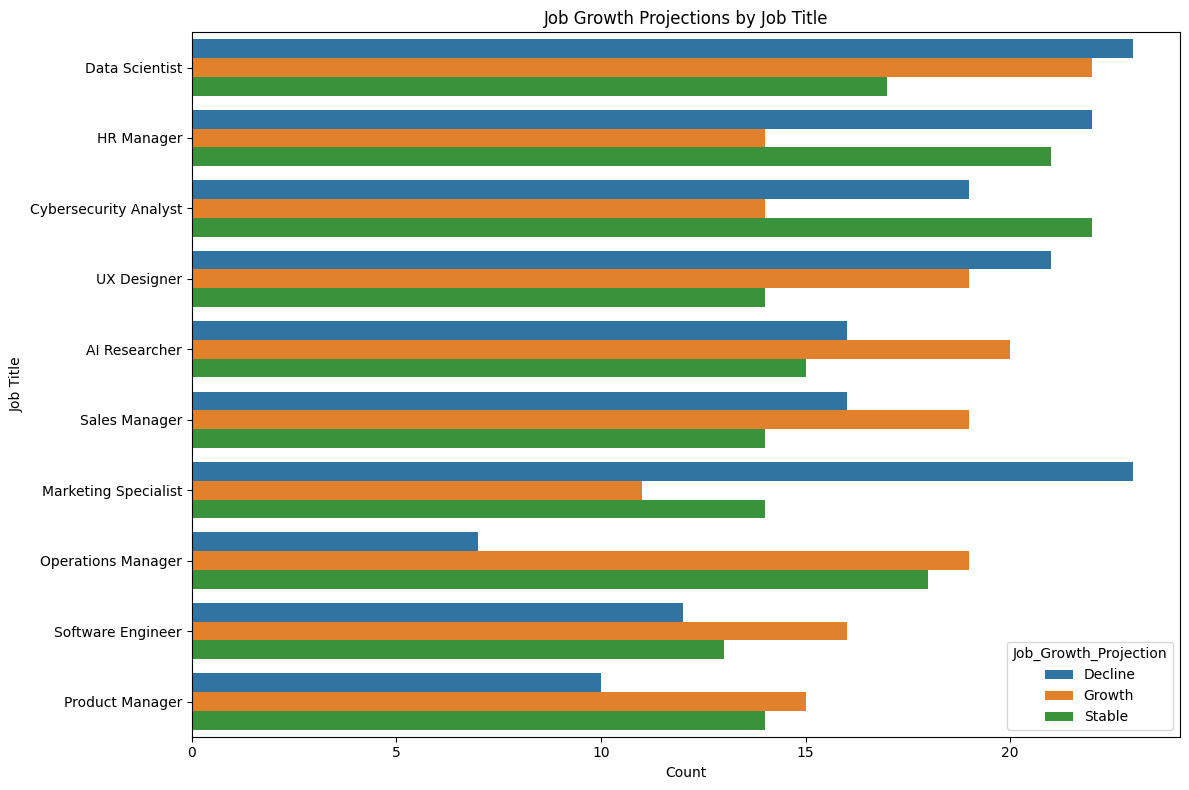

In [33]:
# Create a countplot for job growth projection by job title
plt.figure(figsize=(12,8))
sns.countplot(y='Job_Title', hue='Job_Growth_Projection', data=df, order=df['Job_Title'].value_counts().index)

# Add labels and title
plt.title('Job Growth Projections by Job Title')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

The bar plot above shows the job growth projections for different job titles. The data indicates that Marketing Specialist has the most decline count along with Data scientist, Data Scientist also happens to have the most growth count and Cybersecurity Analyst has the most stable count.
Which tells us that an individual is more likely to find a job easiest Data Science industry.

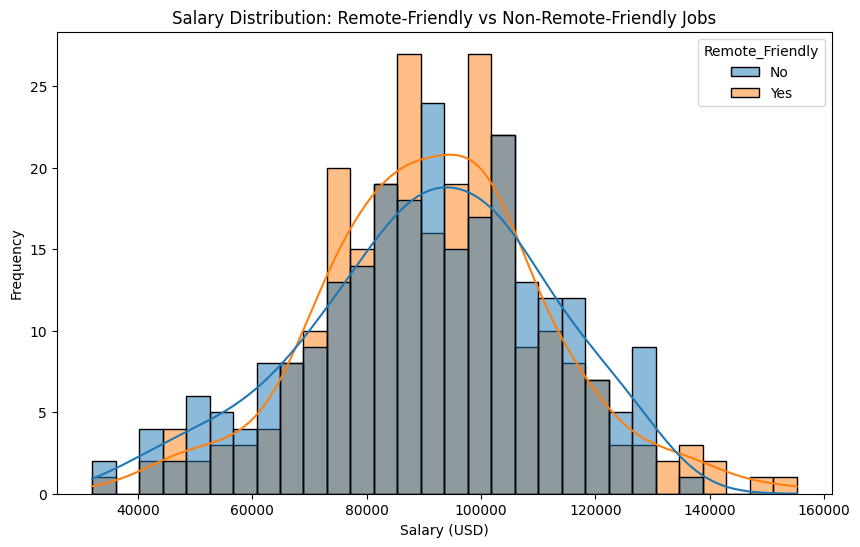

In [35]:
# Histogram to visualize salary distribution for remote-friendly and non-remote-friendly jobs
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Salary_USD', hue='Remote_Friendly', kde=True, bins=30)
plt.title('Salary Distribution: Remote-Friendly vs Non-Remote-Friendly Jobs')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()


This histogram shows how salary distributions compare between remote-friendly and non-remote-friendly jobs, along with a kernel density estimation.

### Data Analytics

In [38]:
# Calculate the average salary for remote and non-remote jobs
remote_salary_comparison = df.groupby('Remote_Friendly')['Salary_USD'].mean().reset_index()

# Print the result
print("Average Salary Comparison (Remote vs Non-Remote):\n", remote_salary_comparison)


Average Salary Comparison (Remote vs Non-Remote):
   Remote_Friendly    Salary_USD
0              No  90746.868994
1             Yes  91694.123935


<ipython-input-38-01a0f53ac7df>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  remote_salary_comparison = df.groupby('Remote_Friendly')['Salary_USD'].mean().reset_index()


In [45]:
# Split data into remote-friendly and non-remote-friendly
remote_salaries = df[df['Remote_Friendly'] == 'Yes']['Salary_USD']
non_remote_salaries = df[df['Remote_Friendly'] == 'No']['Salary_USD']

# Perform t-test
t_stat, p_val = stats.ttest_ind(remote_salaries, non_remote_salaries)

# Display the results
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 0.5161241326872376, P-value: 0.6059967946768645


From histogram and two sets of information above, it can be said that the average salary is higher for remote-friendly jobs than non-remote-friendly jobs but the p-value shows that there is no statistically significant difference between the two.

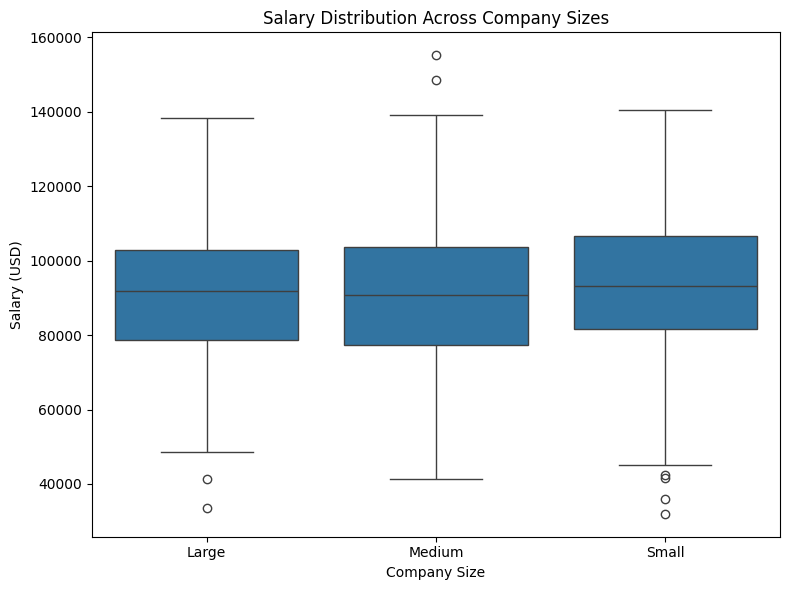

In [39]:
# Create a boxplot to show the salary distribution for different company sizes
plt.figure(figsize=(8,6))
sns.boxplot(x='Company_Size', y='Salary_USD', data=df)

# Add labels and title
plt.title('Salary Distribution Across Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show()


The box plot above shows the salary distribution across different company sizes and from it we can see that small companies generally have the highest salaries with the exception of 4 outliers.

Location             Berlin         Dubai        London      New York  \
Company_Size                                                            
Large          89797.449736  89076.992347  88821.921691  97937.662232   
Medium         90095.651508  83412.305503  86855.524138  95159.105345   
Small         104306.021400  90785.958889  90526.539819  88825.008270   

Location             Paris  San Francisco     Singapore        Sydney  \
Company_Size                                                            
Large         83829.407154   87613.769064  98016.839807  92954.969686   
Medium        97508.688047   82211.235413  92744.631634  92655.479663   
Small         94987.943783   95041.574089  90633.568793  90197.897905   

Location             Tokyo       Toronto  
Company_Size                              
Large         91102.739967  85705.641234  
Medium        98233.042969  94344.487136  
Small         90639.421447  86650.886641  


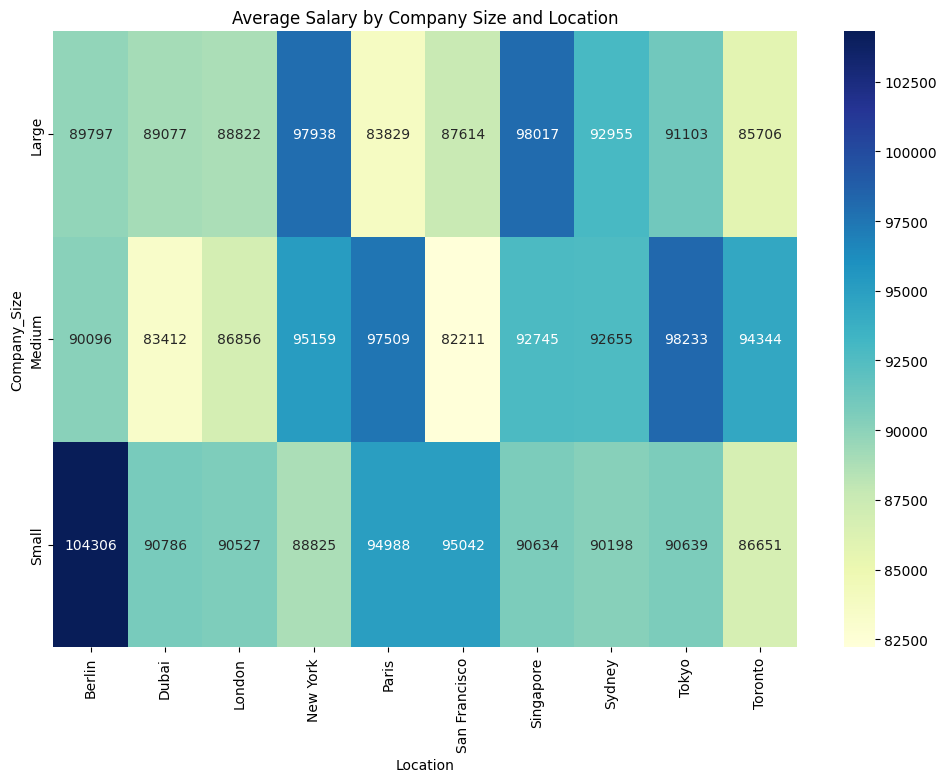

In [49]:
# Create a pivot table to summarize average salary by company size and location
salary_pivot = df.pivot_table(values='Salary_USD', index='Company_Size', columns='Location', aggfunc='mean')

# Display the pivot table
print(salary_pivot)

# Heatmap to visualize the salary distribution
plt.figure(figsize=(12,8))
sns.heatmap(salary_pivot, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title('Average Salary by Company Size and Location')
plt.show()


The heatmap shows the salary differences across various company sizes and locations, and provides insights into geographic and organizational effects on compensation.

In [40]:
# Calculate the proportion of jobs in each AI adoption level
ai_adoption_proportion = df['AI_Adoption_Level'].value_counts(normalize=True) * 100

# Print the result
print("Proportion of Jobs by AI Adoption Level:\n", ai_adoption_proportion)


Proportion of Jobs by AI Adoption Level:
 AI_Adoption_Level
Medium    35.8
Low       34.8
High      29.4
Name: proportion, dtype: float64


The information above shows the proportion of jobs for each AI adoption level, and tells us that there is mostly a medium AI adoption level for the jobs.

## Data Analysis

<ipython-input-56-aaa1a47441e1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  remote_friendly_by_industry = df.groupby('Industry')['Remote_Friendly'].apply(lambda x: (x == 'Yes').mean() * 100)


Industry
Education             50.877193
Energy                55.102041
Entertainment         59.574468
Finance               50.943396
Healthcare            57.142857
Manufacturing         43.103448
Retail                43.478261
Technology            44.642857
Telecommunications    49.056604
Transportation        51.282051
Name: Remote_Friendly, dtype: float64


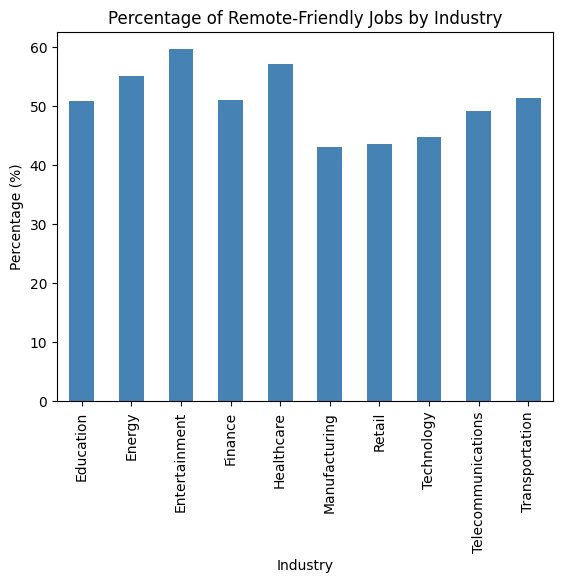

In [56]:
# Group by 'Industry' and calculate the percentage of remote-friendly jobs
remote_friendly_by_industry = df.groupby('Industry')['Remote_Friendly'].apply(lambda x: (x == 'Yes').mean() * 100)

# Display the results
print(remote_friendly_by_industry)

# Plotting the results
remote_friendly_by_industry.plot(kind='bar', color='steelblue', title='Percentage of Remote-Friendly Jobs by Industry')
plt.ylabel('Percentage (%)')
plt.show()


The bar chart above displays the proportion of remote-friendly jobs across different industries, giving insights into how flexible industries are regarding remote work. The bar charts shows the Entertainmentis has highest percentage of remote friendly jobs and Manufacturing has the least percentage.  

# Conclusion

In conclusion, the analysis of the AI job market dataset has revealed valuable insights using various data preparation, analytics, and visualization techniques. Key findings include:

**Salary Insights:** Average salary varies significantly across job titles, industries, and company sizes. For example, smaller companies often offer higher salaries, while certain industries, like technology, provide competitive compensation.

**AI Adoption Trends:** Different industries exhibit varying levels of AI adoption, with some industries like technology being more AI-driven, while others lag behind.

**Automation Risk:** Jobs in industries with high automation risk tend to require specific skills, and certain industries, such as healthcare and manufacturing, show higher concentrations of automation-prone roles.

**Job Growth and Remote Work:** The data highlights the importance of job growth projections and remote-friendliness in shaping future opportunities. Remote-friendly jobs offer a competitive edge, often with higher salaries, especially in tech-related fields.

Through this analysis, we observed patterns that can help job seekers, companies, and policymakers better understand the dynamics of the AI job market and prepare for the future. The combination of AI adoption, automation risk, and job growth will continue to shape the landscape of employment, with significant implications for the global workforce.